In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; 

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay ,f1_score ,r2_score

from sklearn.svm import SVR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('balling and roughness.xlsx', sheet_name = 'Sheet3')
df

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,aspect raio length/depth,"solidification time , s",Weber number,"surface tension, N/m",Unnamed: 27,VED,p,pi,spatter,ref
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,6.890023,0.891650,0.762707,-237.920389,Spatter,37.004658,0.107712,239.224864,blank,https://www.sciencedirect.com/science/article/...
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,7.385967,0.679509,0.946459,-201.276391,Spatter,31.453959,0.091556,222.985317,blank,NaN
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,6.748390,0.528135,1.118781,-172.905271,Spatter,27.351269,0.079614,212.679234,blank,NaN
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,7.955675,0.416143,1.273442,-150.448638,Spatter,24.195353,0.070427,201.928468,blank,NaN
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,6.665874,0.330995,1.405504,-132.335280,Spatter,21.692386,0.063142,197.160224,blank,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,3.550000,89.262943,0.007957,-620.499381,NaN,176.928521,0.686667,1123.165659,blank,NaN
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,3.800000,65.927109,0.011478,-552.006536,NaN,141.542817,0.549333,947.743444,blank,NaN
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,3.860000,51.695324,0.015553,-499.215539,NaN,117.952347,0.457778,817.866562,blank,NaN
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,3.860000,42.142234,0.020133,-456.050759,NaN,101.102012,0.392381,710.030117,blank,NaN


In [3]:
# Assuming df is your DataFrame
columns_to_delete = ['ref','depth/thickness','length/width','width/depth', 'density kg/m^3','conductivity w/m.k','specific heat J/kg.k',
                     'surface temperature T_s , K', 'surface tension, N/m','Peak temp. , K','recoil pressure , pa', 'Unnamed: 20','spatter' ,'p','pi','Unnamed: 27']  # List of columns to delete



# Deleting the specified columns
df1 = df.drop(columns=columns_to_delete, inplace=False)
df1

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,"surface tension force , N",surface tension / spot size,normalized enthalpy,maragoni number,aspect raio length/depth,"solidification time , s",Weber number,VED
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,LOF,0.511600,0.002374,27777.777778,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,LOF,0.470605,0.002134,27777.777778,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,LOF,0.434673,0.001894,27777.777778,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,Desired,0.403247,0.001701,27777.777778,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,LOF,0.375698,0.001524,27777.777778,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,LOF,0.698683,0.012405,8333.333333,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,Desired,0.695379,0.011431,8333.333333,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,Desired,0.689330,0.010718,8333.333333,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,Desired,0.680603,0.010153,8333.333333,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012


In [4]:
# Assuming df is your DataFrame and 'melt pool shape' is the column you want to replace values in

# Define the mapping of values to be replaced
replacement_map = {'LOF': 0, 'keyhole': 1, 'Desired': 2, 'balling': 3}

# Replace values in the 'melt pool shape' column using the mapping
df1['meltpool shape'] = df1['meltpool shape'].replace(replacement_map)

# Display the DataFrame after replacement
print("DataFrame after replacing values in 'melt pool shape' column:")
df1

DataFrame after replacing values in 'melt pool shape' column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,"surface tension force , N",surface tension / spot size,normalized enthalpy,maragoni number,aspect raio length/depth,"solidification time , s",Weber number,VED
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,0.002374,27777.777778,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,0.002134,27777.777778,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,0.001894,27777.777778,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,0.001701,27777.777778,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,0.001524,27777.777778,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,0.012405,8333.333333,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,0.011431,8333.333333,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,0.010718,8333.333333,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,0.010153,8333.333333,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012


In [5]:
# Assuming df is your DataFrame and 'column1' and 'column2' are the columns you want to multiply

# Create a new column by multiplying 'column1' and 'column2'
df1['effective_power'] = df1['Power'] * df1['absorptivity']

# Display the DataFrame with the new column
print("DataFrame with the new column:")
df1


DataFrame with the new column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,"surface tension force , N",surface tension / spot size,normalized enthalpy,maragoni number,aspect raio length/depth,"solidification time , s",Weber number,VED,effective_power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,0.002374,27777.777778,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,0.002134,27777.777778,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,0.001894,27777.777778,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,0.001701,27777.777778,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,0.001524,27777.777778,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,0.012405,8333.333333,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,0.011431,8333.333333,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,0.010718,8333.333333,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,0.010153,8333.333333,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,340.301603


In [6]:
# Define the mapping of values to be replaced
replacement_map = {'LOF': 0, 'keyhole': 1, 'Desired': 2, 'balling': 3}

# Replace values in the 'melt pool shape' column using the mapping
df1['meltpool shape'] = df1['meltpool shape'].replace(replacement_map)

# Display the DataFrame after replacement
print("DataFrame after replacing values in 'melt pool shape' column:")
df1

DataFrame after replacing values in 'melt pool shape' column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,"surface tension force , N",surface tension / spot size,normalized enthalpy,maragoni number,aspect raio length/depth,"solidification time , s",Weber number,VED,effective_power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,0.002374,27777.777778,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,0.002134,27777.777778,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,0.001894,27777.777778,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,0.001701,27777.777778,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,0.001524,27777.777778,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,0.012405,8333.333333,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,0.011431,8333.333333,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,0.010718,8333.333333,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,0.010153,8333.333333,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,340.301603


In [7]:
columns_to_delete = ['Power','surface tension / spot size']  # List of columns to delete



# Deleting the specified columns
df2 = df1.drop(columns=columns_to_delete, inplace=False)
df2

,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,"surface tension force , N",normalized enthalpy,maragoni number,aspect raio length/depth,"solidification time , s",Weber number,VED,effective_power
0,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,0.002374,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,102.319994
1,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,0.002134,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,94.121044
2,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,0.001894,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,86.934645
3,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,0.001701,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,80.649475
4,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,0.001524,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,0.012405,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,349.341321
297,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,0.011431,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,347.689251
298,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,0.010718,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,344.664948
299,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,0.010153,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,340.301603


In [8]:
# Assuming df is your DataFrame

# Filter out rows where 'velocity' is greater than 2000
filtered_df2 = df2[df2['Velocity'] <= 2000]

# Display the filtered DataFrame
print("Filtered DataFrame:")
filtered_df2

Filtered DataFrame:


,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,"surface tension force , N",normalized enthalpy,maragoni number,aspect raio length/depth,"solidification time , s",Weber number,VED,effective_power
0,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,0.002374,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,102.319994
1,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,0.002134,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,94.121044
2,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,0.001894,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,86.934645
3,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,0.001701,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,80.649475
4,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,0.001524,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,0.012405,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,349.341321
297,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,0.011431,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,347.689251
298,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,0.010718,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,344.664948
299,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,0.010153,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,340.301603


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [10]:
import pandas as pd

def detect_outliers_zscore_all(df, num_stds=3):
  """
  This function detects outliers based on z-scores within a specified number of standard deviations for all numerical columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      num_stds (int, optional): The number of standard deviations to consider outliers. Defaults to 3.

  Returns:
      pandas.DataFrame: A DataFrame with columns indicating outliers (True) or inliers (False) for each numerical column.
      pandas.Index: The indices of rows containing outliers in any column.
  """
  outliers_df = pd.DataFrame(index=df.index)  # Create an empty DataFrame for outliers
  outlier_indices = []  # Initialize a list to store outlier row indices
  for col in df.select_dtypes(include=[np.number]):  # Iterate through numerical columns
    outliers = abs(df[col] - df[col].mean()) / df[col].std() > num_stds
    outliers_df[f'outliers_{col}'] = outliers  # Add a column named 'outliers_{col}' with outlier flags
    outlier_indices.extend(outliers[outliers].index)  # Add outlier indices to the list
  return outliers_df, pd.Index(outlier_indices)  # Return outlier flags DataFrame and outlier indices

# Assuming 'filtered_df2' is your prepared DataFrame and 'threshold' is defined

# Calculate z-scores and identify outlier indices
outliers_df, outlier_indices_zscore = detect_outliers_zscore_all(df2.copy())

# **Important: Consider if removing outliers is the best approach**
# (See previous discussion about potential drawbacks of removing outliers)

# If you decide to remove outliers:
# Drop the rows corresponding to the outlier indices
filtered_df_cleaned = df2.drop(outlier_indices_zscore)

# Display the cleaned DataFrame (optional)
print("DataFrame after removing outliers detected by z-score method:")
print(filtered_df_cleaned.shape)


DataFrame after removing outliers detected by z-score method:
(244, 16)


In [11]:
# # Find the indices of rows where any z-score exceeds the threshold
# outliers_indices_zscore = z_scores.index[(z_scores > threshold).any(axis=1)]

# # Drop the rows corresponding to the outlier indices
# filtered_df_cleaned = filtered_df.drop(outliers_indices_zscore)

# # Display the cleaned DataFrame
# print("DataFrame after removing outliers detected by z-score method:")
# print(filtered_df_cleaned.shape)

In [12]:
# Get the indices of outliers detected by Isolation Forest method
# outliers_indices_isolation_forest = filtered_df2.index[outliers_isolation_forest]

# # Drop the rows corresponding to the outlier indices
# filtered_df2_cleaned = filtered_df2.drop(outliers_indices_isolation_forest)

# # Display the cleaned DataFrame
# print("DataFrame after removing outliers detected by Isolation Forest method:")
# print(filtered_df2_cleaned)


In [13]:
filtered_df_cleaned

,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,"surface tension force , N",normalized enthalpy,maragoni number,aspect raio length/depth,"solidification time , s",Weber number,VED,effective_power
0,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,0.002374,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,102.319994
1,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,0.002134,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,94.121044
2,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,0.001894,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,86.934645
3,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,0.001701,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,80.649475
4,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,0.001524,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,140.0,100.0,80.0,409.132018,481.569429,1624.254112,0,0.699992,0.005334,39.655745,585.000000,3.970000,11.601815,0.044342,319.893085,157.498139
277,170.0,100.0,80.0,414.076711,463.116369,1515.520762,0,0.699939,0.004998,35.984279,537.000000,3.660000,8.914828,0.061005,263.441364,157.486220
278,200.0,100.0,80.0,310.431040,445.868551,1440.400024,0,0.699751,0.004759,33.166978,424.000000,4.640000,7.202000,0.080251,223.925159,157.444030
279,290.0,100.0,80.0,273.390583,404.344250,1312.274798,0,0.697074,0.004333,27.438300,320.000000,4.800000,4.525086,0.153719,154.431144,156.841684


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'filtered_df_cleaned' is your cleaned DataFrame containing the data
# Assuming 'X' contains features and 'y_width' contains the target variable 'width of melt pool'

# Split the dataset into features (X) and the target variable (y_width)
X = filtered_df_cleaned.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape'])  # Features excluding the target variable
y = filtered_df_cleaned['meltpool shape']  # Target variable

In [15]:
X

,Velocity,layer thickness,beam D,absorptivity,"surface tension force , N",normalized enthalpy,maragoni number,aspect raio length/depth,"solidification time , s",Weber number,VED,effective_power
0,850.0,30.0,90.0,0.511600,0.002374,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,102.319994
1,1000.0,30.0,90.0,0.470605,0.002134,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,94.121044
2,1150.0,30.0,90.0,0.434673,0.001894,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,86.934645
3,1300.0,30.0,90.0,0.403247,0.001701,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,80.649475
4,1450.0,30.0,90.0,0.375698,0.001524,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...
276,140.0,100.0,80.0,0.699992,0.005334,39.655745,585.000000,3.970000,11.601815,0.044342,319.893085,157.498139
277,170.0,100.0,80.0,0.699939,0.004998,35.984279,537.000000,3.660000,8.914828,0.061005,263.441364,157.486220
278,200.0,100.0,80.0,0.699751,0.004759,33.166978,424.000000,4.640000,7.202000,0.080251,223.925159,157.444030
279,290.0,100.0,80.0,0.697074,0.004333,27.438300,320.000000,4.800000,4.525086,0.153719,154.431144,156.841684


In [16]:
y

0      0
1      0
2      0
3      2
4      0
      ..
276    0
277    0
278    0
279    0
280    2
Name: meltpool shape, Length: 244, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming 'X' contains features and 'y' contains the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy: 0.9183673469387755
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.83      0.91      0.87        11
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         2

    accuracy                           0.92        49
   macro avg       0.87      0.88      0.87        49
weighted avg       0.92      0.92      0.92        49



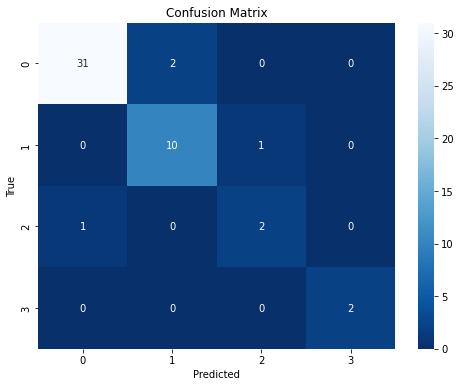

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with dark color scheme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix(4).png', dpi=1600)  # Save the figure with high quality
plt.show()
